<font color = green >


# Dimensionality reduction

</font>

Objectives:
- visualization 
- data compression 

<font color = green >

### Data compression

</font>

<img src = "img/pca_1.png" height=300 width= 300>
<img src = "img/pca_2.png" height=300 width= 300>


<font color = green >

### Data compression

</font>

$$X\in R^{3} \quad  \longrightarrow  \quad Z\in R^{2}$$


<img src = "img/pca_3.png" height=300 width= 300  align = 'left'>
<img src = "img/pca_5.png" height=300 width= 300  align = 'left'>

<img src = "img/pca_6.png" height=300 width= 300  align = 'left'>


<font color = green >


## Principle Component Analisis (PCA)

</font>

Find the lower dimensional surface that minimizes projection error.

From 2-dimension to 1-dimension, find the direction(vector $\overrightarrow {u} \in R^{2}$):

<img src = "img/pca_8.png" height=300 width= 300  align = 'left'>



From n-dimension to k-dimension, find the $k$ vectors $\overrightarrow {u_{1}}, \overrightarrow {u_{2}}, ...\overrightarrow {u_{k}}$, each  ${u_{i}} \in R^{n}$, s.t. minimizes projection of data onto those vectors.


#### Note: It's important to normalize (scale) features first

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib notebook

In [3]:
from sklearn.datasets import make_regression

<IPython.core.display.Javascript object>


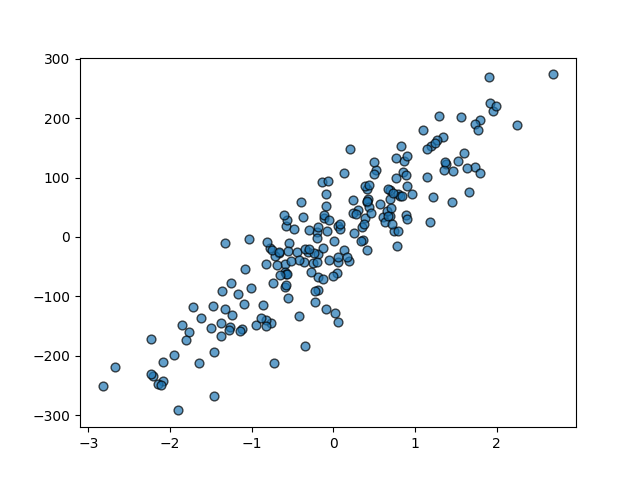

In [4]:
x,y = make_regression(n_samples=200, n_features=1, noise=50, random_state=150)
# n_samples= 200
# intercept = 0
# coef = .3
# np.random.seed(0)
# x = np.random.normal(loc=0, scale=2, size=n_samples)
# # x = np.random.uniform(0,10, size=n_samples)
# y = intercept + x * coef + np.random.normal(loc=0, scale=.2, size=n_samples)

plt.scatter(x, y, s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

In [5]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>


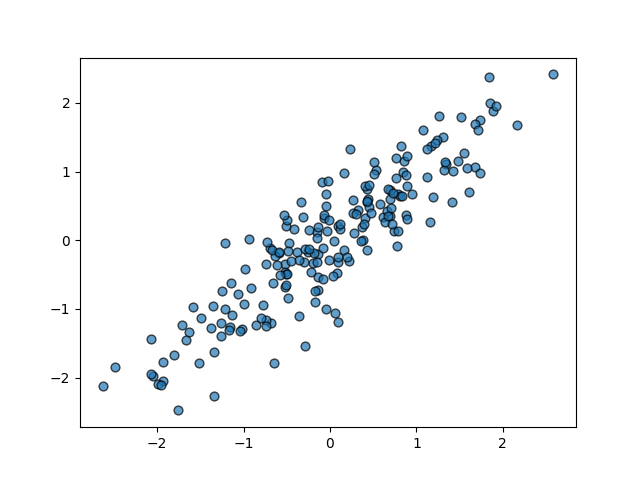

In [6]:
scaler = StandardScaler()
X_origin= np.c_[x,y]
X=  scaler.fit_transform(X_origin)
m,n = X.shape
plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)


<font color = green >


### Covariance Matrix

</font>

In case of each feature have exactly zero mean the $$cov(X)= \frac{1}{m}\cdot X^{T} @ X$$
Note: `np.cov(X)` expects matrix each row of m represents a variable, and each column a single observation of all those variables. You may set rowvar= False or send $X^{T}$ as input param.


In [7]:
cov_matrix= np.cov(X.T, ddof=0) # ddof=0 will return the simple average 
print('numpy cov_matrix:\n', cov_matrix)
sigma = 1/(m) * X.T @ X
print('\ncomputed explicitly cov_matrix:\n', sigma)

numpy cov_matrix:
 [[1.         0.89552492]
 [0.89552492 1.        ]]

computed explicitly cov_matrix:
 [[1.         0.89552492]
 [0.89552492 1.        ]]


<font color = green >


### Eigenvectors 

</font>

${ A\mathbf {v} =\lambda \mathbf {v} }$


<img src = "https://upload.wikimedia.org/wikipedia/commons/3/3c/Mona_Lisa_eigenvector_grid.png" height=400 width= 400  align = 'left'>

<div style="clear:left;"></div>

In this shear mapping the red arrow changes direction but the blue arrow does not.<br> The <font color = blue ><b>blue </b></font> arrow is an eigenvector  of this shear mapping because it does not change direction, and since its length is unchanged, its eigenvalue is 1.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Mona_Lisa_with_eigenvector.png/1024px-Mona_Lisa_with_eigenvector.png" height=400 width= 400  align = 'left'>

<div style="clear:left;"></div>

The red arrow does not change direction but the blue arrow does. .<br>The <font color = red ><b>red </b></font> arrow is an eigenvector now. 




In [8]:
# deliberately created cell to avoid skipping next  cell execution

In [9]:
w, v = np.linalg.eig(cov_matrix) # w - eigenvalues, v - normalized eigenvectors,  
# such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
v

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

<IPython.core.display.Javascript object>


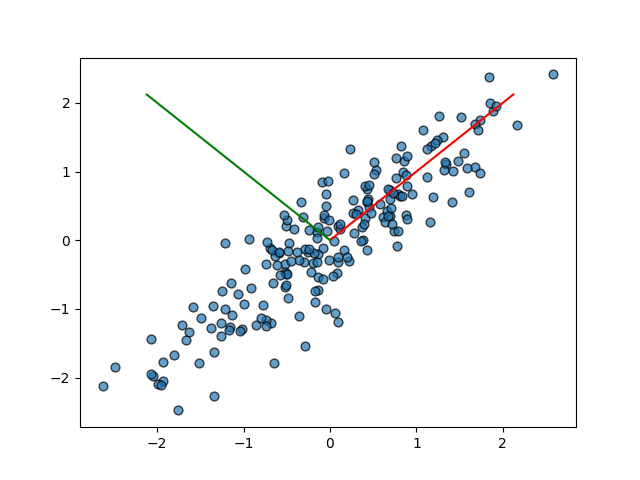

In [10]:
plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

v0= v[:, 0] # Note: every columns is vector 
v1= v[:, 1]

plt.plot ([0, v0[0]*3],[0, v0[1]*3], '-', c= 'r')
plt.plot ([0, v1[0]*3],[0, v1[1]*3], '-', c= 'g')

<font color = green >

### Transfrom data

</font>

Select $k$ of $n$ computed eigenvalues and transform data $Z= X @ U_{reduce}$ (shape is (m,k), where $U_{reduce}$  is matrix of $k$ eigenvectors (shape is (n,k))


In [11]:
k = 1
U_reduce = v[:, :k] 
Z= X@ U_reduce
print (Z.shape)
Z[:10]

(200, 1)


array([[ 0.6049806 ],
       [ 1.80500688],
       [-0.23794344],
       [ 0.39228405],
       [-0.37834171],
       [ 1.28401895],
       [-0.33232537],
       [ 0.07685455],
       [-1.41229873],
       [-1.29273423]])

<font color = green >

### Decompress data 

</font>


In [12]:
X_approximate = Z @ U_reduce.T

In [13]:
X_approximate.shape

(200, 2)

<IPython.core.display.Javascript object>


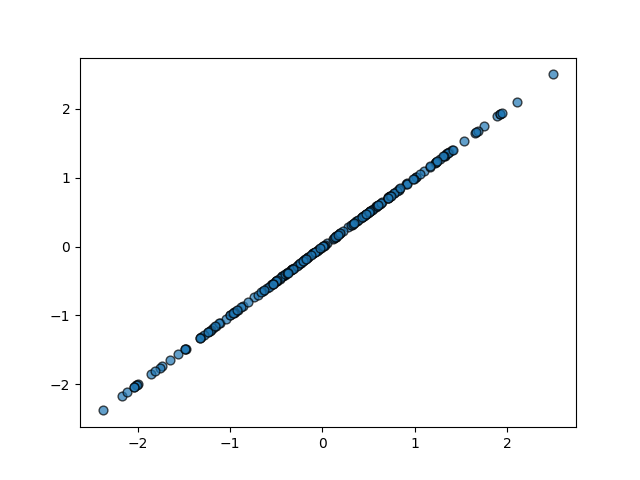

In [14]:
plt.figure()
plt.scatter(X_approximate[:,0], X_approximate[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)


<font color = green >

## sklearn

</font>



[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


<IPython.core.display.Javascript object>


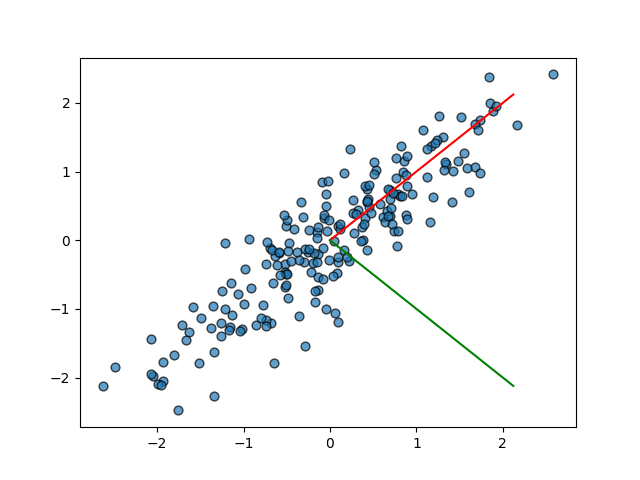

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print (pca.components_) # components_ : array, shape (n_components, n_features)

plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

v0= pca.components_[0] # Note: every row is vector 
v1= pca.components_[1]

plt.plot ([0, v0[0]*3],[0, v0[1]*3], '-', c= 'r')
plt.plot ([0, v1[0]*3],[0, v1[1]*3], '-', c= 'g')

In [16]:
v

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

<font color = green >

#### Transform data 

</font>


In [17]:
Z= pca.transform(X)
print (Z.shape)
Z[:10]

(200, 2)


array([[ 0.6049806 , -0.23289819],
       [ 1.80500688, -0.14390189],
       [-0.23794344,  0.0419352 ],
       [ 0.39228405,  0.12971415],
       [-0.37834171,  0.09603827],
       [ 1.28401895,  0.39703249],
       [-0.33232537,  0.1247178 ],
       [ 0.07685455, -0.11897265],
       [-1.41229873, -0.36088833],
       [-1.29273423,  0.89024902]])

<font color = green >

#### Check explicit  transforming data 

</font>


In [18]:
eigen_vecors= pca.components_  
U_reduce = eigen_vecors[:2]
Z= X @ U_reduce.T
print (Z.shape)
Z[:10]

(200, 2)


array([[ 0.6049806 , -0.23289819],
       [ 1.80500688, -0.14390189],
       [-0.23794344,  0.0419352 ],
       [ 0.39228405,  0.12971415],
       [-0.37834171,  0.09603827],
       [ 1.28401895,  0.39703249],
       [-0.33232537,  0.1247178 ],
       [ 0.07685455, -0.11897265],
       [-1.41229873, -0.36088833],
       [-1.29273423,  0.89024902]])

<font color = green >

#### Decompress data 

</font>


<IPython.core.display.Javascript object>


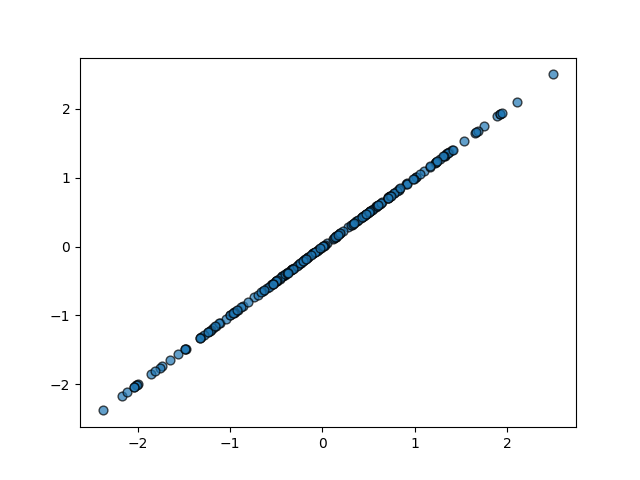

In [19]:
pca = PCA(n_components=1)
Z= pca.fit_transform(X)

# eigen_vecors= pca.components_ 
# X_approximate = Z @ eigen_vecors
X_approximate = pca.inverse_transform(Z)

plt.figure()
plt.scatter(X_approximate[:,0], X_approximate[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)


<font color = green >

## Determine number $k$ of pronciple components 

</font>

For given $k$, compute $U_{reduce}$, $Z$, $X_{approx}$ and check condition

$$ \frac { \sum _{ i=0 }^{ m-1 }{ \left\| x^{ (i) }-x_{ approx }^{ (i) } \right\| ^{ 2 } }  }{ \sum _{ i=0 }^{ m-1 }{ \left\| x^{ (i) } \right\| ^{ 2 } }  } \le \quad 0.05$$

Fine the smallest $k$ s.t. it satisfies condition.

In [20]:
def comress_score(X, X_approximate):
    return np.sum(np.apply_along_axis (np.linalg.norm,1, (X-X_approximate))**2)/\
        np.sum(np.apply_along_axis (np.linalg.norm,1, X)**2)
comress_score(X, X_approximate)

0.05223753781771527

<font color = green >

## Sample: compress images with PCA

</font>


In [21]:
from scipy.io import loadmat
fn = 'pca_faces.mat'

<font color = green >

### Load data 

</font>


In [22]:
mat= loadmat(fn)
X= mat['X']
X.shape

(5000, 1024)

<IPython.core.display.Javascript object>


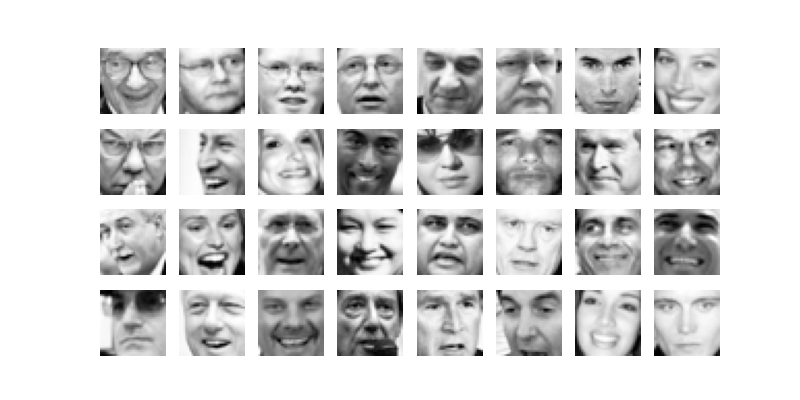

In [23]:
def display_samples_in_grid(X, n_rows, n_cols= None):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)

    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j

            x= X[index]

            height = width = int(np.sqrt(len(x)))
            # max_val = np.max(np.abs(x))
            x = x.reshape (height, width).T # max_val
            
            ax = plt.subplot(n_rows,n_cols, index+1)
            ax.imshow(x, cmap='Greys_r')

            plt.axis('off')

n_rows, n_cols = 4, 8
plt.figure(figsize=(n_cols, n_rows))
display_samples_in_grid(X, n_rows, n_cols)

<font color = green >

### Scale 

</font>


<IPython.core.display.Javascript object>


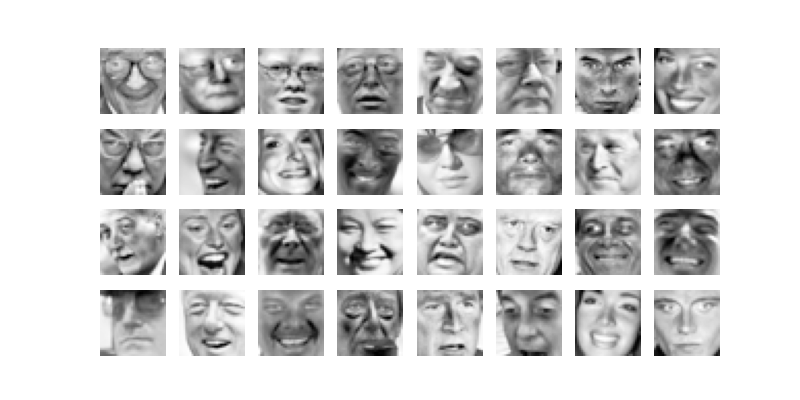

In [24]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
# x_inversed = scaler.inverse_transform(X_scaled)
plt.figure(figsize=(n_cols, n_rows))
display_samples_in_grid(X_scaled, n_rows, n_cols, )

<font color = green >

### Run PCA 

</font>


Z.shape =  (5000, 200)


<IPython.core.display.Javascript object>


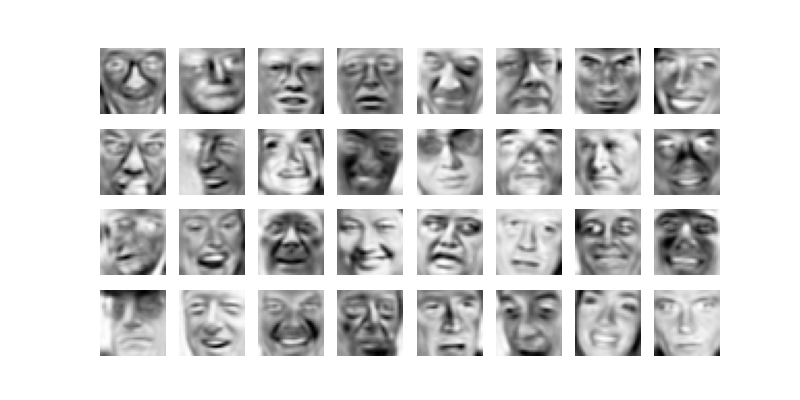

Compress score= 0.027


In [25]:
pca = PCA(n_components=200)
Z= pca.fit_transform(X_scaled)
print ('Z.shape = ',Z.shape)
X_approximate = pca.inverse_transform(Z)

plt.figure(figsize=(n_cols, n_rows))
display_samples_in_grid(X_approximate, n_rows, n_cols)

print ('Compress score= {0:.3f}'.format(comress_score(X_scaled, X_approximate)))

<font color = green >

### Run w/o scaling 

</font>


Z.shape =  (5000, 100)


<IPython.core.display.Javascript object>


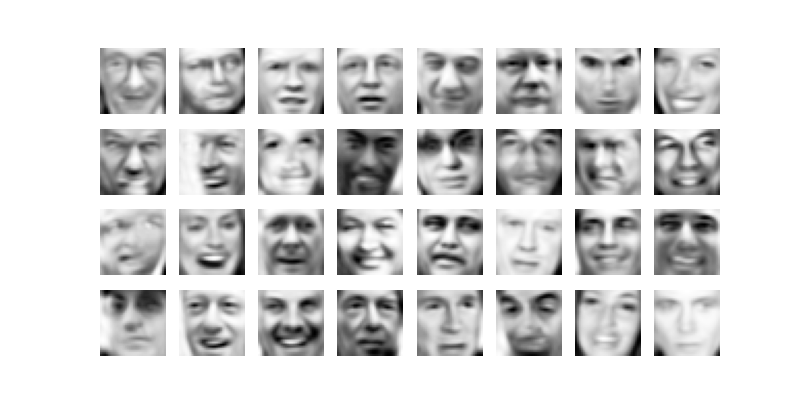

Compress score= 0.057


In [26]:
pca = PCA(n_components=100)
Z= pca.fit_transform(X)
print ('Z.shape = ',Z.shape)
X_approximate = pca.inverse_transform(Z)

plt.figure(figsize=(n_cols, n_rows))
display_samples_in_grid(X_approximate, n_rows, n_cols)
print ('Compress score= {0:.3f}'.format(comress_score(X, X_approximate)))

<font color = green >

## Home Task

</font>

Apply PCA to breast cancer dataset and visualize 2 principle components.

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names

In [44]:
scaler = StandardScaler()
X=  scaler.fit_transform(X)

<IPython.core.display.Javascript object>


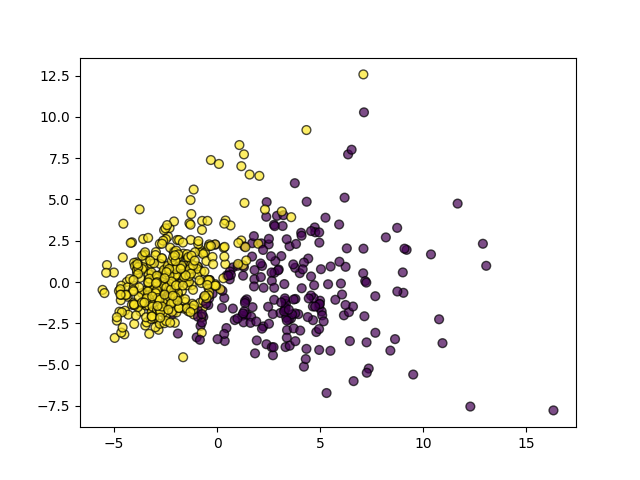

In [45]:
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40,c=y, cmap=plt.cm.viridis, edgecolor = 'black', label='negative', alpha = 0.7)

<font color = blue >

### Expected output

</font>

<img src = "img/breast_cancer_pca.png" align = 'left'>


<font color = green >

## Learn more
</font>

[numpy.cov](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)

[Eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)

[numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)